In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

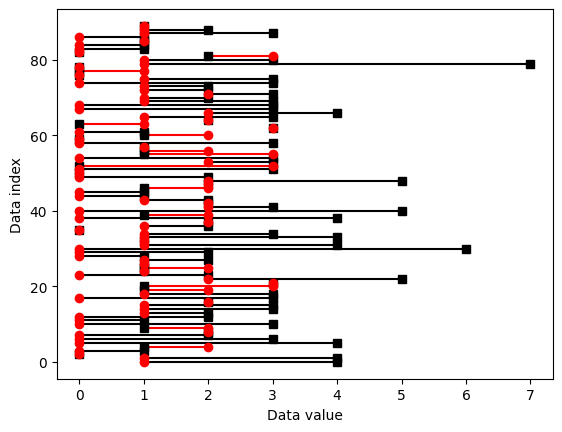

In [41]:
## generate the data
# x<y, y<x 의 경우 플로팅
N = 90
# 비정규분포 데이터 생성 
data1 = np.random.poisson(2,N)
data2 = np.random.poisson(1,N)

colors = 'kr'
for i in range(N):
    plt.plot([data1[i],data2[i]],[i,i],colors[int(data1[i]<data2[i])])

plt.plot(data1,np.arange(N),'ks',markerfacecolor='k',label='data1')
plt.plot(data2,np.arange(N),'ro',markerfacecolor='r',label='data2')

plt.ylabel('Data index')
plt.xlabel('Data value')
plt.legend()

plt.show()

In [19]:
# now for the test
t,p = stats.wilcoxon(data1,data2)
print('Wilcoxon z=%g, p=%g'%(t,p))

Wilcoxon z=284, p=8.84834e-07


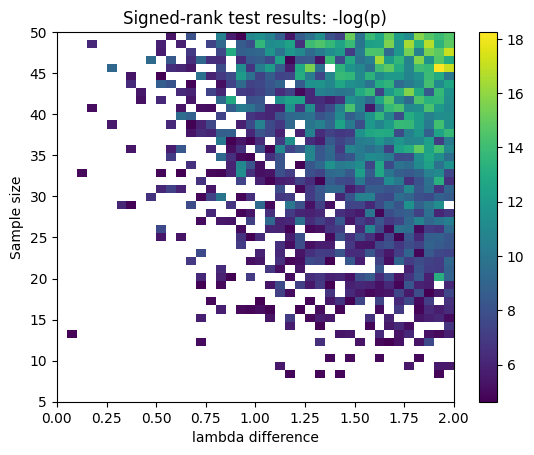

In [24]:
## now for the 2D space

# parameter ranges
Ns = np.arange(5,51)
lambdas = np.linspace(1,3,40)

# initialize output matrix
pvals = np.zeros((len(Ns),len(lambdas)))

for ni in range(len(Ns)):
    for li in range(len(lambdas)):

        #generate some data
        data1 = np.random.poisson(lambdas[0],Ns[ni])
        data2 = np.random.poisson(lambdas[li],Ns[ni])

        # compute the statistic
        t,p = stats.wilcoxon(data1,data2)

        # store the results
        pvals[ni,li] = -np.log(p)# 최적화 과정, 이렇게하면 p값의 미세한 차이를 더 잘 구분할 수 있다.
        #0~1사이 값을 로그함수 적용 할 시, 음수 나온다, 그리고, 0에 한없이 가까워져 많은 소숫점을 가지면 가질수록, 더 큰 값이 나온다.
        # 즉, 0에 한없이 가까울수록 값이 커지므로, p값의 미세한 차이를 더 구분할수 있게 되는것

# optional p-value thresholding
pvalthresh = .01
pvals[pvals<-np.log(pvalthresh)] = np.NaN # p값의 로그값이 0.01보다 작은 값이면 Nan처리 -> 더 잘 시각화하기 위해

# now show in a heatmap!
plt.imshow(pvals,origin='lower',extent=[lambdas[0]-1,lambdas[-1]-1,Ns[0],Ns[-1]],aspect='auto')
plt.xlabel('lambda difference')
plt.ylabel('Sample size')
plt.title('Signed-rank test results: -log(p)')
plt.colorbar()
plt.show

# 그래프를 보면 큰 람다 차이 있더라도, 사이즈 작으면 유의성이 없는것에 비해, 람다 차이가 작더라도  사이즈가 크면 유의성을 갖는것을 볼 수 있음

/var/folders/vl/r365j2vx2wv3v02bqbw29rk80000gn/T/ipykernel_15887/153577755.py:1: RuntimeWarning: invalid value encountered in log
  np.log(-1)


nan